# Algorithmic Trading Model Using LSTM

**By Omran Shahbazi**

## What is Algorithmic Trading?

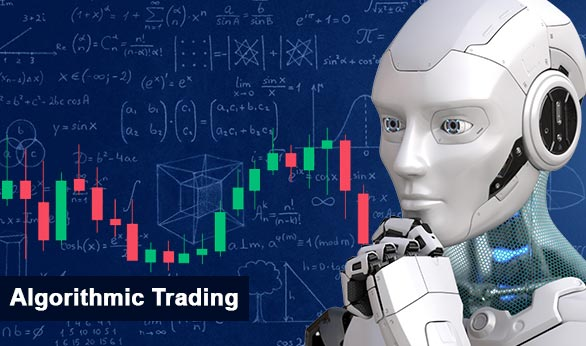

Algorithmic trading in one sentence means that instead of doing our own transactions,  build an intelligent agent and give it the necessary access, and most importantly, simulate the environment for it in such a way that it can make the best decision at any moment. Buy or sell an asset to ultimately maximize the profit of the transaction.
The issue that we want to express here is the issue of **"High-Frequency Algorithmic Trading"**, which, of course, should be said in this project, the transactions that are carried out are in the daily time frame, and in practice, high-frequency trading requires a lot of resources and good access to brokers. It is financial transactions and here we collected the data we need using the yahoo finance site API , the minimum time frame in which we can have the data is equal to one minute, but basically HFT, it means to make a large number of transactions in a fraction of a second.
What in HFT The important thing for us is not the result of just one transaction, and the important thing is how much profit we can earn in a long period of time, because in this field, it is very difficult to predict and it is practically impossible to achieve an accuracy of 80 or 90%. We only We will increase the profits of our transactions with an optimistic method. In fact, it is not important whether we make profit or loss today, but what is important is what happens to us in the long run.

The issue we want to discuss is the issue of algorithmic trading.
In the past, as many of us probably have experience, it has happened to buy a financial asset such as a company's shares.
What was our strategy for buying that asset?

When are we going to sell it?

What happens if we can't sell it?

What if we lose?

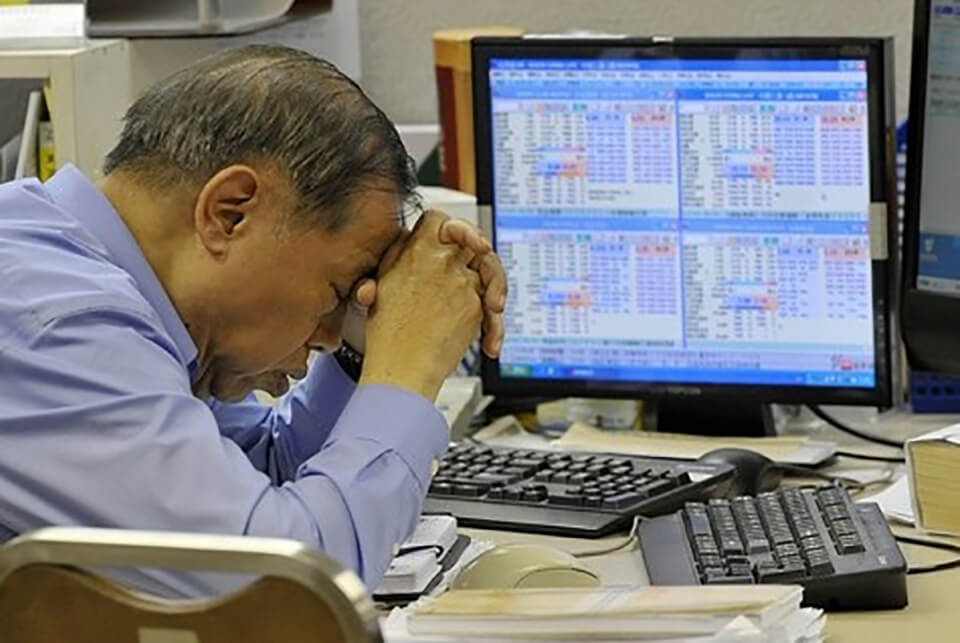

Due to the recent access to data, especially financial data, as well as the advances in machine learning, we are moving in the direction that instead of spending time on face analysis companies' financials and checking the company's stock price chart, let's try to use this information and facilities available to us so that we can make our work easier.

The biggest issue that occurs for those who are engaged in financial transactions is the issue of controlling emotions during transactions.
It is possible that one of your trades should be closed at a very large loss in less than a few seconds, and at that time you will feel the revenge of the market and it will make you suffer a lot.

The most important advantage of algorithmic trading is precisely that the trader and his emotions are removed from trading.
Another big advantage of this is that it allows us to test our models multiple times on different assets and then if we can trust its performance we can allow it to trade.

Another good thing about algorithmic trading is that it eliminates irregularities from the market. For example, if there is an arbitrage opportunity in the market, these models can find it very quickly and eliminate it, which helps to make the market more rational.



## Prevoius Works

If we want to talk about the works that have been done in the past in this field, the point that is very important is that before these developments in Deep Learning that is when algorithms like LSTM were not developed, most of the works that were done in the field of algorithmic trading were classical statistical models, among which the most widely used models was a  model called Arima.

Arima It is a linear regression model that actually predicts a time series based on previous data, whose formula is as shown below:

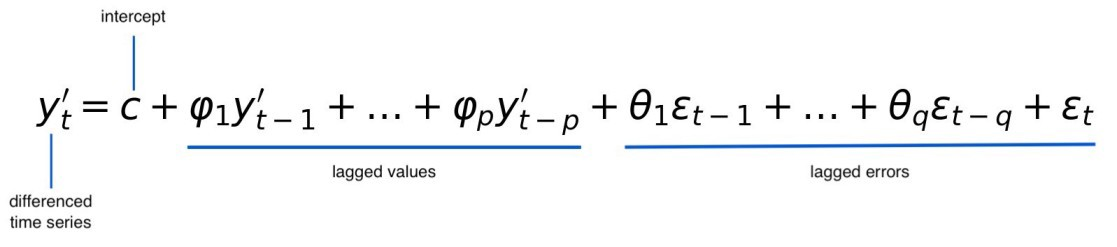



The great assumption that in relation to Arima It is established that, as it is clear from its formula, the price at time t changes linearly with the price in the past and the error. This assumption is sometimes correct, but in most cases it is wrong. As  EUR/USD pair shows:

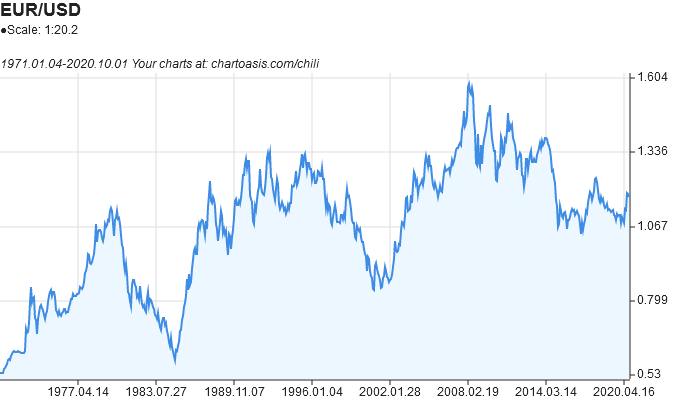


Due to the emergence and progress of deep learning approach and solution method in time series models from traditional models such as Arima They moved towards models like LSTM and provided us with the ability to predict non-linear models, and according to the results obtained, one of which can be seen in **Zhichao Zou and Zihao Qu**'s paper that below, I mentioned it, it can be seen that these models are work more efficiently.


**Refferences :**

*   Jakub Micha´nków, Paweł Sakowski and Robert Slepaczuk ( LSTM in Algorithmic Investment Strategies on BTC and
S&P500 Index )

*   Zineb Lanbouri, Saaid Achchab ( A new approach for Trading based on Long-Short Term Memory technique )

*   Zhichao Zou and Zihao Qu, Center for Professional Development, Stanford University ( Using LSTM in Stock prediction and Quantitative
Trading )

*   David Benjamin Lim, Department of Mathemtics, Stanford University
and Justin Lundgren, MS&E, Stanford University ( Algorithmic Trading using LSTM-Models for Intraday Stock Predictions )



## The Approach

To solve this problem, we go to recurrent neural networks, because order is important in these networks, and in addition to data at moment "t" depends on data at earlier times.

But again, a problem that recurrent neural networks have is that if the sequence of inputs is long, the effect of the initial data becomes less and less. This is where we go to a special architecture of recurrent neural networks called **LSTM** and They solve this problem by using the gates that are placed inside them.

Each of these gates in this LSTM architecture does a special job for us. For example, the "forget gate" helps us to delete a piece of information that has a little importance and to keep it if it was important. The "input gate" ensures that only important information enters the network.

Here we used three LSTM models, the first model is a so-called "Vanilla LSTM" model , which is actually considered a basic model and has the simplest form of architecture that only uses the daily return value and a hidden layer with 32 neurons. It predicts the trend of price movement for us.

The second model is called "Stacked LSTM" , and like the previous model, it uses the daily return variable for prediction, with the difference that instead of one hidden layer, it uses two hidden layers with 32 neurons.

Finally, the third model has a similar architecture to the second model, only in addition to the daily return, it uses the transaction volume and a technical analysis index as inputs.



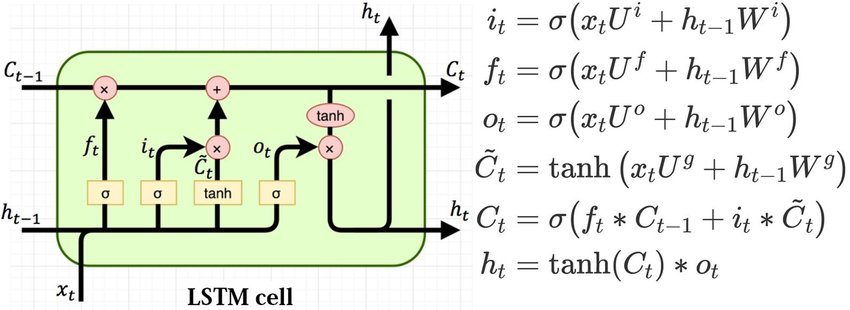

# Start Coding ✌

## Initial Setups

**mplfinance** is one of the most useful libraries for visulization in finance era

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 4.6 MB/s eta 0:00:00


In [ ]:
#Required libraries
import numpy as np                    #for numerical computation
import matplotlib.pyplot as plt       #for data visualization
import seaborn as sns                 #for data visualization
import pandas as pd                   #for data manipulation and analysis
import mplfinance as fplt             #for financial data visualization

## Understanding Business Question

Algorithmic Trading

Billionaire Mathematician - Jim Simons

https://www.youtube.com/watch?v=gjVDqfUhXOY

## Read Data from Yahoo Finance API

In [ ]:
#Get data directly from Yahoo Finance website:
#https://uk.finance.yahoo.com/most-active

We use **yfinance** library to fetch the desired data

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yfin

In [ ]:
#Load data from Yahoo Finance API
data = yfin.download("^GSPC", start = "2016-01-01", end = "2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1258, 6)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05 00:00:00-05:00,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06 00:00:00-05:00,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07 00:00:00-05:00,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08 00:00:00-05:00,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


The **Open** column shows the oppening price of the asset on a particular day.

Also, the columns **Close**, **High** and **Low** show the closing price, the highest and the lowest price on that day, respectively.

The **Volume** column shows the traded volume of that asset, and finally, the **Adj Close** column is obtained based on a change on the Close column, and it is not important for us.

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23 00:00:00-05:00,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000
2020-12-24 00:00:00-05:00,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2020-12-28 00:00:00-05:00,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2020-12-29 00:00:00-05:00,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000
2020-12-30 00:00:00-05:00,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3154850000


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2683.657884,2696.949911,2668.868180,2683.940634,2683.940634,3.889959e+09
std,424.103296,426.716508,421.526315,424.055800,424.055800,1.002889e+09
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296530e+09
25%,2365.442505,2371.927551,2353.339966,2364.075073,2364.075073,3.310090e+09
50%,2713.040039,2729.315063,2697.474976,2711.834961,2711.834961,3.646305e+09
75%,2930.932434,2945.187500,2918.397522,2933.377441,2933.377441,4.156210e+09
max,3750.010010,3756.120117,3730.209961,3735.360107,3735.360107,9.053950e+09


## Data Visualization of Financial Data

Time series / date functionality in Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

We use a especial type of diagram called "Candlestick" to represent financial data and some other line charts to show the changes in price and volume over time.



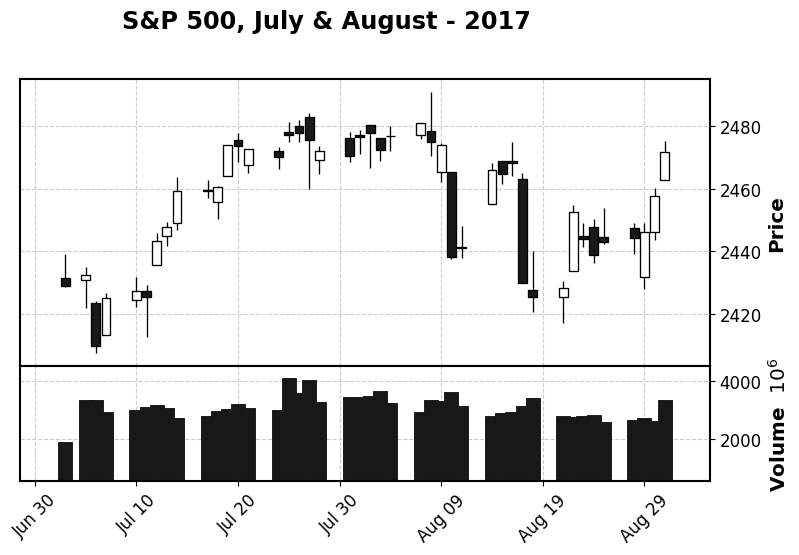

In [ ]:
#Candlestick
fplt.plot(data.loc['2017-07-1': '2017-08-31', :], type = 'candle',
          style = 'classic', volume  = True, show_nontrading = True,
          figratio = (10,6), title = 'S&P 500, July & August - 2017')

And more colorful and responsive version of the above chart is shown below.

Here we use from "Plotly" package to show these type of charts

In [ ]:
import plotly.graph_objects as go             # import "ploty.graph_objects" to plot candlestick chart

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=data.reset_index()['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'])])              #Create a candlestick chart

fig.update_xaxes(title_text='Date')               #Update X-Axis title
fig.update_yaxes(title_text='Index Value')              #Update X-Axis title
fig.update_layout(xaxis_rangeslider_visible=True, title = 'S&P 500 Chart')              #  Set Range Slider Bar and Title

fig.show()

In the above chart, it is possible to set a limit on the time to see a specific range of time

In [ ]:
import plotly.express as px             # import "ploty.express" to plot line chart

In [ ]:
fig = px.line(data.reset_index(), x="Date", y="Close", title='S&P 500 Changes Over Time')           #S&P 500 price over time
fig.update_yaxes(title_text='Index value')              #Update Y-Axis title

fig.show()

In [ ]:
fig = px.line(data.reset_index(), x="Date", y="Volume", title='Traded Volume of s&P 500 Over Time')           #S&P 500 Volume over time
fig.update_yaxes(title_text='Volume')              #Update Y-Axis title

fig.show()

## Data Preparation


Here we just apply a little modification on the columns's nmae, because I think it's more convinient to work with columns if their name were lowercase.

In [ ]:
#Extract Open, Close Price and Volume
data = data[['Open', 'Close', 'Volume']]
data.rename(columns = {'Open': 'open',
                       'Close': 'close',
                       'Volume': 'volume'}, inplace = True)
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,volume
Date,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000


In [ ]:
fig = px.line(data.reset_index(), x="Date", y="close", title='S&P 500 Changes Over Time')
fig.update_yaxes(title_text='Index value')              #Update Y-Axis title

fig.show()

As you can see, the price is not a **statinary** variable and this is in contradiction with the initial assumption in the prediction of time series data, so here we try to create a column called **daily return**, which is equal to the difference between today's price and the previous day's price. , divided by the previous day's price

In [ ]:
#Shift close price and volume
data['close_shift'] = data['close'].shift(1)
data['volume_shift'] = data['volume'].shift(1)
data.head()

<ipython-input-20-e2faa0bc1d1a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-e2faa0bc1d1a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,volume,close_shift,volume_shift
Date,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000,NaN,NaN
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000,2012.660034,4.304880e+09
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000,2016.709961,3.706620e+09
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000,1990.260010,4.336660e+09
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000,1943.089966,5.076590e+09


In [ ]:
#Calculate daily return
data['daily_return'] = (data['close'] - data['close_shift']) / data['close_shift']
#Calculate volume change
data['vol_change'] = (data['volume'] - data['volume_shift']) / data['volume_shift']
data.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change
Date,,,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000,NaN,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000,2012.660034,4.304880e+09,0.002012,-0.138973
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000,2016.709961,3.706620e+09,-0.013115,0.169977
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000,1990.260010,4.336660e+09,-0.023700,0.170622
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000,1943.089966,5.076590e+09,-0.010838,-0.081088


Lets's go and see the volatility of daily return ...

In [ ]:
fig = px.line(data.reset_index(), x="Date", y="daily_return", title='S&P 500 Daily Return Over Time')
fig.update_yaxes(title_text='Daily Return')              #Update Y-Axis title

fig.show()

Now this column is a statinary variable and can be used for prediction

Below, we plot the distribution of daily return

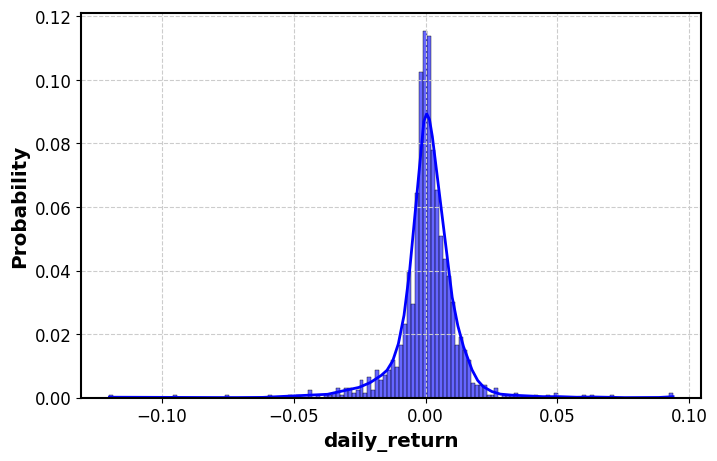

In [ ]:
#Plot daily return distribution

plt.figure(figsize=(8, 5))
sns.histplot(data['daily_return'], stat = 'probability',
             kde = True, alpha = 0.6, color = 'blue')
plt.show()


This is amazing but it was predictable :))

The average of daily return is almost Zero!

In [ ]:
data['daily_return'].describe()

count    1257.000000
mean        0.000565
std         0.012115
min        -0.119841
25%        -0.002912
50%         0.000712
75%         0.005259
max         0.093828
Name: daily_return, dtype: float64

Here is volatility of volume change

In [ ]:
fig = px.line(data.reset_index(), x="Date", y="vol_change", title='S&P 500 Daily Volume Change')           #Bitcoin daily volume change over time
fig.update_yaxes(title_text='Volume Change')              #Update Y-Axis title

fig.show()

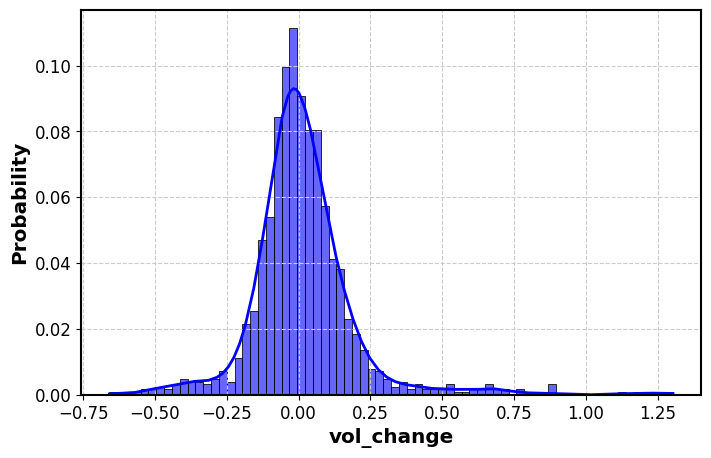

In [ ]:
#Plot daily volume change distribution

plt.figure(figsize=(8, 5))
sns.histplot(data['vol_change'], stat = 'probability',
             kde = True, alpha = 0.6, color = 'blue')
plt.show()

Similar to daily return, it was predictable that there is no change in volume over time in average

We want to use some Technical Analysis tools.

There is a packege called "ta" in python that helps us to do so. We use "ta" to create some fiancial indicator like "RSI" (Relative Strength Index) .

There is a Library called "ta" for Technical Analysis.
First we should install it

In [ ]:
! pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=b6e829f4ca3d299bbee3b544c0707e255821bee35b1506ba338a89193270de9b
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


**What Is the Relative Strength Index (RSI)?**

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.


$ RSI = 100 – [100 / ( 1 + ((period - 1)*Average of Upward Price Change + current gain)) / ( 1 + ((period - 1)*Average of Downward Price Change + currentloss))] $

In [ ]:
#Relative Strength Index (RSI)
# https://www.investopedia.com/terms/r/rsi.asp
import ta
data['rsi'] = ta.momentum.rsi(data['open'], 4)
data.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi
Date,,,,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000,2012.660034,4.304880e+09,0.002012,-0.138973,NaN
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000,2016.709961,3.706620e+09,-0.013115,0.169977,NaN
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000,1990.260010,4.336660e+09,-0.023700,0.170622,0.0
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000,1943.089966,5.076590e+09,-0.010838,-0.081088,0.0


In [ ]:
#Plot rsi time series
fig = px.line(data.reset_index(), x="Date", y="rsi", title='S&P 500 RSI Indicator')
fig.update_yaxes(title_text='RSI')              #Update Y-Axis title

fig.show()

**RSI** is an index between 0 to 100 and we want to scale this here ...

In [ ]:
#min-max normalization to scale the data
from sklearn.preprocessing import MinMaxScaler
data['rsi_scaled'] = MinMaxScaler().fit_transform(data[['rsi']])
data.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled
Date,,,,,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000,2012.660034,4.304880e+09,0.002012,-0.138973,NaN,NaN
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000,2016.709961,3.706620e+09,-0.013115,0.169977,NaN,NaN
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000,1990.260010,4.336660e+09,-0.023700,0.170622,0.0,0.0
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000,1943.089966,5.076590e+09,-0.010838,-0.081088,0.0,0.0


In [ ]:
data['rsi_scaled'].describe()

count    1255.000000
mean        0.597722
std         0.230532
min         0.000000
25%         0.438906
50%         0.621899
75%         0.781470
max         1.000000
Name: rsi_scaled, dtype: float64

In [ ]:
#Market trend
#This method is good for complex conditions(here we have simple conditions!)
#create a list of conditions
conditions = [data['daily_return'] < 0,
              data['daily_return'] >= 0]

#create a list of the values needed to assign for each condition
values = [0, 1]

#create a new column and use np.select to assign values to it using the lists as arguments
data['trend'] = np.select(conditions, values)
data.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2016-01-04 00:00:00-05:00,2038.199951,2012.660034,4304880000,NaN,NaN,NaN,NaN,NaN,NaN,0
2016-01-05 00:00:00-05:00,2013.780029,2016.709961,3706620000,2012.660034,4.304880e+09,0.002012,-0.138973,NaN,NaN,1
2016-01-06 00:00:00-05:00,2011.709961,1990.260010,4336660000,2016.709961,3.706620e+09,-0.013115,0.169977,NaN,NaN,0
2016-01-07 00:00:00-05:00,1985.319946,1943.089966,5076590000,1990.260010,4.336660e+09,-0.023700,0.170622,0.0,0.0,0
2016-01-08 00:00:00-05:00,1945.969971,1922.030029,4664940000,1943.089966,5.076590e+09,-0.010838,-0.081088,0.0,0.0,0


In [ ]:
data['trend'].value_counts()

1    701
0    557
Name: trend, dtype: int64

In [ ]:
#Remove first six rows
data.drop(axis = 0, index = data.index[0 : 6], inplace = True)
data.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2016-01-12 00:00:00-05:00,1927.829956,1938.680054,4887260000,1923.670044,4.607290e+09,0.007803,0.060767,3.036420,0.030948,1
2016-01-13 00:00:00-05:00,1940.339966,1890.280029,5087030000,1938.680054,4.887260e+09,-0.024965,0.040876,25.193454,0.256779,0
2016-01-14 00:00:00-05:00,1891.680054,1921.839966,5241110000,1890.280029,5.087030e+09,0.016696,0.030289,11.529652,0.117514,1
2016-01-15 00:00:00-05:00,1916.680054,1880.329956,5468460000,1921.839966,5.241110e+09,-0.021599,0.043378,35.495037,0.361776,0
2016-01-19 00:00:00-05:00,1888.660034,1881.329956,4928350000,1880.329956,5.468460e+09,0.000532,-0.098768,25.266745,0.257526,1


### Divide Dataset into Train and Test and Real

I want to split the dataset into **3(!)** parts

One for training, another one for testing and the last one for **Implementing the strategy** 😎

In [ ]:
train = data.loc['2016' : '2018', ]
train.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2016-01-12 00:00:00-05:00,1927.829956,1938.680054,4887260000,1923.670044,4.607290e+09,0.007803,0.060767,3.036420,0.030948,1
2016-01-13 00:00:00-05:00,1940.339966,1890.280029,5087030000,1938.680054,4.887260e+09,-0.024965,0.040876,25.193454,0.256779,0
2016-01-14 00:00:00-05:00,1891.680054,1921.839966,5241110000,1890.280029,5.087030e+09,0.016696,0.030289,11.529652,0.117514,1
2016-01-15 00:00:00-05:00,1916.680054,1880.329956,5468460000,1921.839966,5.241110e+09,-0.021599,0.043378,35.495037,0.361776,0
2016-01-19 00:00:00-05:00,1888.660034,1881.329956,4928350000,1880.329956,5.468460e+09,0.000532,-0.098768,25.266745,0.257526,1


In [ ]:
test = data.loc['2019', ]
test.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2019-01-02 00:00:00-05:00,2476.959961,2510.030029,3733160000,2506.850098,3.461920e+09,0.001268,0.078350,48.579834,0.495140,1
2019-01-03 00:00:00-05:00,2491.919922,2447.889893,3858830000,2510.030029,3.733160e+09,-0.024757,0.033663,55.111526,0.561713,0
2019-01-04 00:00:00-05:00,2474.330078,2531.939941,4234140000,2447.889893,3.858830e+09,0.034336,0.097260,45.959139,0.468429,1
2019-01-07 00:00:00-05:00,2535.610107,2549.689941,4133120000,2531.939941,4.234140e+09,0.007010,-0.023858,69.492817,0.708291,1
2019-01-08 00:00:00-05:00,2568.110107,2574.409912,4120060000,2549.689941,4.133120e+09,0.009695,-0.003160,76.675453,0.781498,1


In [ ]:
real = data.loc['2020', ]
real.head()

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3257.850098,3459930000,3230.780029,2.894760e+09,0.008379,0.195239,66.176674,0.674492,1
2020-01-03 00:00:00-05:00,3226.360107,3234.850098,3484700000,3257.850098,3.459930e+09,-0.007060,0.007159,48.929674,0.498705,0
2020-01-06 00:00:00-05:00,3217.550049,3246.280029,3702460000,3234.850098,3.484700e+09,0.003533,0.062490,41.920475,0.427266,1
2020-01-07 00:00:00-05:00,3241.860107,3237.179932,3435910000,3246.280029,3.702460e+09,-0.002803,-0.071993,61.965897,0.631574,0
2020-01-08 00:00:00-05:00,3238.590088,3253.050049,3726840000,3237.179932,3.435910e+09,0.004902,0.084673,58.353761,0.594758,1


## Build Prediction Model Using RNN

### Model 1: Vanilla LSTM - Univariate

In [ ]:
#Define the feature set X and response variable for train dataset
#Time window
window = 4
X_train = []
y_train = []
for i in range(window, train.shape[0]):
    X_train.append(train.iloc[i - window : i, 5]) #Use only daily return
    y_train.append(train.iloc[i, 9])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[ 0.0078028 , -0.02496545,  0.01669591, -0.0215991 ],
       [-0.02496545,  0.01669591, -0.0215991 ,  0.00053182],
       [ 0.01669591, -0.0215991 ,  0.00053182, -0.01169386],
       ...,
       [-0.01577211, -0.02058823, -0.02711225,  0.04959374],
       [-0.02058823, -0.02711225,  0.04959374,  0.00856268],
       [-0.02711225,  0.04959374,  0.00856268, -0.00124158]])

In [ ]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X_train.shape

(744, 4)

In [ ]:
y_train.shape

(744,)

In [ ]:
train[['daily_return', 'trend']].head(5)

,daily_return,trend
Date,,
2016-01-12 00:00:00-05:00,0.007803,1
2016-01-13 00:00:00-05:00,-0.024965,0
2016-01-14 00:00:00-05:00,0.016696,1
2016-01-15 00:00:00-05:00,-0.021599,0
2016-01-19 00:00:00-05:00,0.000532,1


In [ ]:
#Reshape X_train
n_features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], n_features)
X_train.shape

(744, 4, 1)

In [ ]:
#Define the Model Architecture
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)

from tensorflow import keras
model_1 = keras.models.Sequential()
#First layer of LSTM with dropout regularization
model_1.add(keras.layers.LSTM(units = 32,
                              activation = "tanh",                                 #Default activation function
                              recurrent_activation = "sigmoid",                    #Default activation function
                              kernel_initializer = 'he_normal',
                              input_shape = (X_train.shape[1], X_train.shape[2]))) #input shape = (window, n_features)
model_1.add(keras.layers.Dropout(0.5))
#Output layer
model_1.add(keras.layers.Dense(units = 1, activation = "sigmoid", kernel_initializer = 'he_normal'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configure the model
opt = keras.optimizers.Adam(learning_rate = 0.005) #learning rate
model_1.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)
#Train the model
model_1.fit(X_train, y_train, epochs = 250, batch_size = 32, validation_split = 0.2)

Epoch 1/250
19/19 [==============================] - 4s 35ms/step - loss: 0.6927 - accuracy: 0.5076 - val_loss: 0.6953 - val_accuracy: 0.5034
Epoch 2/250
19/19 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5513 - val_loss: 0.6971 - val_accuracy: 0.5034
Epoch 3/250
19/19 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5513 - val_loss: 0.6973 - val_accuracy: 0.5034
Epoch 4/250
19/19 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5513 - val_loss: 0.6988 - val_accuracy: 0.5034
Epoch 5/250
19/19 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5513 - val_loss: 0.6965 - val_accuracy: 0.5034
Epoch 6/250
19/19 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5513 - val_loss: 0.6973 - val_accuracy: 0.5034
Epoch 7/250
19/19 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5513 - val_loss: 0.6963 - val_accuracy: 0.5034
Epoch 8/250


Text(0.5, 1.0, 'Model 1: Loss - Epochs')

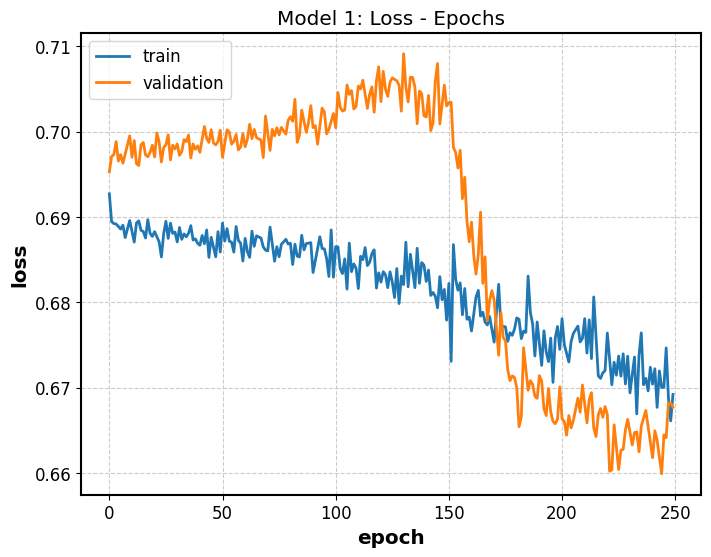

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_1.history.history['loss'], label = 'train')
plt.plot(model_1.history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 1: Loss - Epochs')

Text(0.5, 1.0, 'Model 1: Accuracy - Epochs')

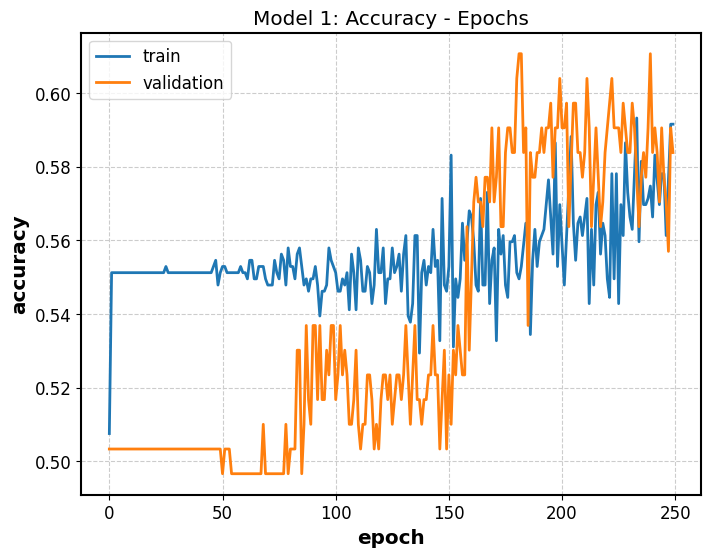

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_1.history.history['accuracy'], label = 'train')
plt.plot(model_1.history.history['val_accuracy'], label = 'validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 1: Accuracy - Epochs')

In [ ]:
#Define the feature set X and response variable for test dataset
#Time window
window = 4
X_test = []
y_test = []
for i in range(window, test.shape[0]):
    X_test.append(test.iloc[i - window : i, 5])
    y_test.append(test.iloc[i, 9])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test.shape

(248, 4)

In [ ]:
#Reshape X_train
n_features = 1
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test.shape

(248, 4, 1)

In [ ]:
#Make prediction on test dataset
y_prob_test = model_1.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 3ms/step


array([[0.5099498 ],
       [0.8680569 ],
       [0.4619239 ],
       [0.48627612],
       [0.56263334],
       [0.59076566],
       [0.4595757 ],
       [0.542087  ],
       [0.5313407 ],
       [0.46160218],
       [0.558666  ],
       [0.534104  ],
       [0.7451362 ],
       [0.52860516],
       [0.57127875],
       [0.5766967 ],
       [0.4664832 ],
       [0.53614503],
       [0.51974154],
       [0.49755237],
       [0.5356272 ],
       [0.53562784],
       [0.652549  ],
       [0.5817619 ],
       [0.5420244 ],
       [0.5206274 ],
       [0.5124073 ],
       [0.53282064],
       [0.4922807 ],
       [0.5408019 ],
       [0.5454997 ],
       [0.6334747 ],
       [0.49957445],
       [0.53838545],
       [0.5487888 ],
       [0.5888352 ],
       [0.5626998 ],
       [0.49511847],
       [0.5494023 ],
       [0.57669425],
       [0.69498205],
       [0.5764907 ],
       [0.44836727],
       [0.5758872 ],
       [0.54090476],
       [0.5098545 ],
       [0.57415074],
       [0.502

In [ ]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]
y_pred_test

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

56.451612903225815

In [ ]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

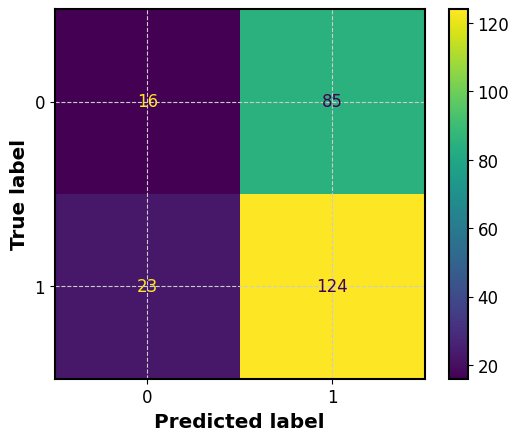

In [ ]:
#Confusion matrix for test dataset
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
#Model evaluation
#Accuracy = TP + TN / Total

print("The Accuracy of This Model is: ", (cm[0][0]+cm[1][1])/len(y_test))

The Accuracy of This Model is:  0.5645161290322581


In [ ]:
#Precision = TP / TP + FP

print("The Precission of This Midel is: ", cm[1][1]/(cm[1][1]+cm[0][1]))

The Precission of This Midel is:  0.5933014354066986


In [ ]:
#Sensitivity
#TP / TP + FN

print("The Sensitivity of This Midel is: ", cm[1][1]/(cm[1][1]+cm[1][0]))

The Sensitivity of This Midel is:  0.8435374149659864


In [ ]:
#Specificity
#TN / TN + FP

print("The Specificity of This Midel is: ", cm[0][0]/(cm[0][0]+cm[0][1]))

The Specificity of This Midel is:  0.15841584158415842


### Model 2: Stacked LSTM - Univariate

In [ ]:
#Define the Model Architecture
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)

from tensorflow import keras
model_2 = keras.models.Sequential()
#First layer of LSTM with dropout regularization
model_2.add(keras.layers.LSTM(units = 32,
                              activation = "tanh",                                 #Default activation function
                              recurrent_activation = "sigmoid",                    #Default activation function
                              kernel_initializer = 'he_normal',
                              return_sequences = True,
                              input_shape = (X_train.shape[1], X_train.shape[2]))) #input shape = (n_steps, n_features)
model_2.add(keras.layers.Dropout(0.5))
#Second layer of LSTM with dropout regularization
model_2.add(keras.layers.LSTM(units = 32, kernel_initializer = 'he_normal'))
model_2.add(keras.layers.Dropout(0.5))
#Output layer
model_2.add(keras.layers.Dense(units = 1, activation = "sigmoid", kernel_initializer = 'he_normal'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4, 32)             4352      
                                                                 
 dropout_1 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configure the model
opt = keras.optimizers.Adam(learning_rate = 0.005) #learning rate
model_2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)
#Train the model
model_2.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_split = 0.2)

Epoch 1/200
19/19 [==============================] - 13s 135ms/step - loss: 0.6926 - accuracy: 0.5042 - val_loss: 0.6994 - val_accuracy: 0.5034
Epoch 2/200
19/19 [==============================] - 0s 14ms/step - loss: 0.6870 - accuracy: 0.5513 - val_loss: 0.6993 - val_accuracy: 0.5034
Epoch 3/200
19/19 [==============================] - 0s 24ms/step - loss: 0.6922 - accuracy: 0.5479 - val_loss: 0.6953 - val_accuracy: 0.5034
Epoch 4/200
19/19 [==============================] - 0s 21ms/step - loss: 0.6905 - accuracy: 0.5513 - val_loss: 0.6980 - val_accuracy: 0.5034
Epoch 5/200
19/19 [==============================] - 0s 9ms/step - loss: 0.6889 - accuracy: 0.5513 - val_loss: 0.6981 - val_accuracy: 0.5034
Epoch 6/200
19/19 [==============================] - 0s 10ms/step - loss: 0.6887 - accuracy: 0.5513 - val_loss: 0.6975 - val_accuracy: 0.5034
Epoch 7/200
19/19 [==============================] - 0s 9ms/step - loss: 0.6913 - accuracy: 0.5513 - val_loss: 0.6966 - val_accuracy: 0.5034
Epoch 

Text(0.5, 1.0, 'Model 2: Loss - Epochs')

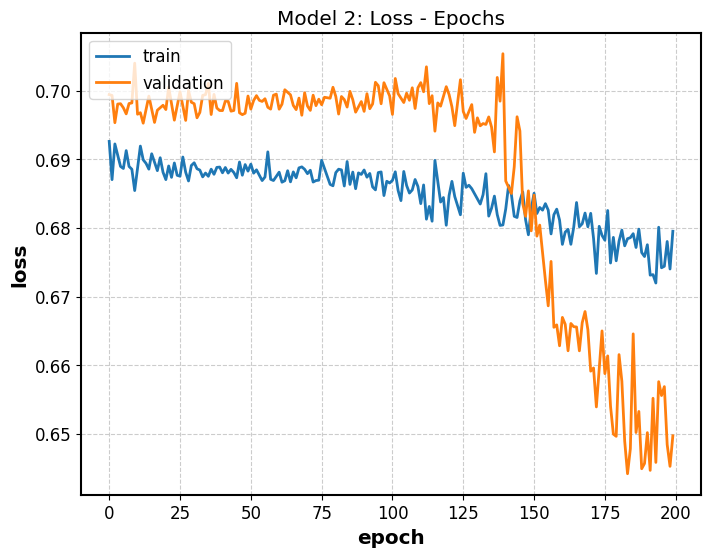

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_2.history.history['loss'], label = 'train')
plt.plot(model_2.history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 2: Loss - Epochs')

Text(0.5, 1.0, 'Model 2: Accuracy - Epochs')

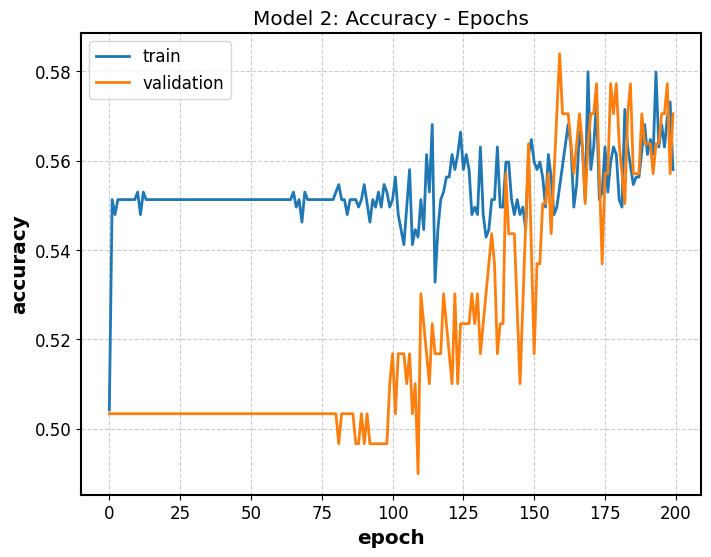

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_2.history.history['accuracy'], label = 'train')
plt.plot(model_2.history.history['val_accuracy'], label = 'validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 2: Accuracy - Epochs')

In [ ]:
#Make prediction on test dataset
y_prob_test = model_2.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 4ms/step


array([[0.53127164],
       [0.7281231 ],
       [0.5015443 ],
       [0.5260538 ],
       [0.5625505 ],
       [0.58597994],
       [0.5167534 ],
       [0.53469586],
       [0.5257675 ],
       [0.5142769 ],
       [0.54129237],
       [0.55266047],
       [0.70350146],
       [0.52646923],
       [0.55910677],
       [0.5670499 ],
       [0.5188281 ],
       [0.5225182 ],
       [0.51450634],
       [0.52633303],
       [0.54755646],
       [0.53876704],
       [0.62490237],
       [0.6218314 ],
       [0.56085634],
       [0.5169247 ],
       [0.51955575],
       [0.5288899 ],
       [0.5376991 ],
       [0.5323637 ],
       [0.5287157 ],
       [0.6035975 ],
       [0.5356505 ],
       [0.53532374],
       [0.536674  ],
       [0.5925983 ],
       [0.5739989 ],
       [0.5201175 ],
       [0.5410779 ],
       [0.55180913],
       [0.6880508 ],
       [0.58594775],
       [0.47279412],
       [0.5814612 ],
       [0.5273783 ],
       [0.51832   ],
       [0.55955017],
       [0.536

In [ ]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]
y_pred_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

58.87096774193549

In [ ]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

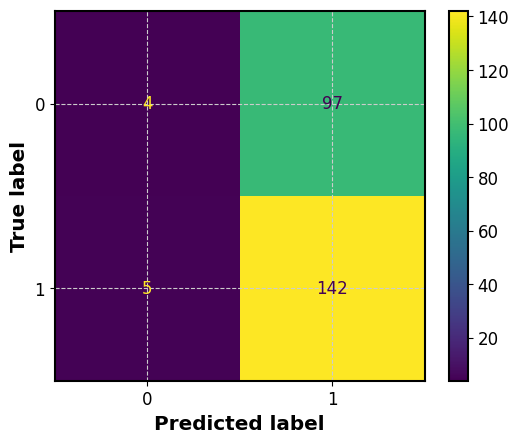

In [ ]:
#Confusion matrix for test dataset
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
#Model evaluation
#Accuracy = TP + TN / Total

print("The Accuracy of This Model is: ", (cm[0][0]+cm[1][1])/len(y_test))

The Accuracy of This Model is:  0.5887096774193549


In [ ]:
#Precision = TP / TP + FP

print("The Precission of This Midel is: ", cm[1][1]/(cm[1][1]+cm[0][1]))

The Precission of This Midel is:  0.5941422594142259


In [ ]:
#Sensitivity
#TP / TP + FN

print("The Sensitivity of This Midel is: ", cm[1][1]/(cm[1][1]+cm[1][0]))

The Sensitivity of This Midel is:  0.9659863945578231


In [ ]:
#Specificity
#TN / TN + FP

print("The Specificity of This Midel is: ", cm[0][0]/(cm[0][0]+cm[0][1]))

The Specificity of This Midel is:  0.039603960396039604


### Model 3: Stacked LSTM - Multivariate

In [ ]:
#Define the feature set X and response variable for train dataset
#Time window
window = 4
X_train = []
y_train = []
for i in range(window, train.shape[0]):
    X_train.append(train.iloc[i - window : i, [5, 6, 8]])
    y_train.append(train.iloc[i, 9])

In [ ]:
X_train[0]

,daily_return,vol_change,rsi_scaled
Date,,,
2016-01-12 00:00:00-05:00,0.007803,0.060767,0.030948
2016-01-13 00:00:00-05:00,-0.024965,0.040876,0.256779
2016-01-14 00:00:00-05:00,0.016696,0.030289,0.117514
2016-01-15 00:00:00-05:00,-0.021599,0.043378,0.361776


In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#X_train = np.array(list(map(lambda x: x.to_numpy(), X_train)))

In [ ]:
X_train

array([[[ 7.80279852e-03,  6.07667414e-02,  3.09480700e-02],
        [-2.49654523e-02,  4.08756645e-02,  2.56778972e-01],
        [ 1.66959054e-02,  3.02887933e-02,  1.17513545e-01],
        [-2.15990980e-02,  4.33782157e-02,  3.61775687e-01]],

       [[-2.49654523e-02,  4.08756645e-02,  2.56778972e-01],
        [ 1.66959054e-02,  3.02887933e-02,  1.17513545e-01],
        [-2.15990980e-02,  4.33782157e-02,  3.61775687e-01],
        [ 5.31821554e-04, -9.87682090e-02,  2.57525972e-01]],

       [[ 1.66959054e-02,  3.02887933e-02,  1.17513545e-01],
        [-2.15990980e-02,  4.33782157e-02,  3.61775687e-01],
        [ 5.31821554e-04, -9.87682090e-02,  2.57525972e-01],
        [-1.16938552e-02,  3.01869794e-01,  2.19895768e-01]],

       ...,

       [[-1.57721063e-02,  9.06201058e-02,  7.94227941e-02],
        [-2.05882283e-02,  3.62667222e-01,  5.97939466e-02],
        [-2.71122545e-02, -6.58695803e-01,  3.55818784e-02],
        [ 4.95937428e-02,  6.25966553e-01,  2.71235098e-02]],

   

In [ ]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
train.head(5)

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend
Date,,,,,,,,,,
2016-01-12 00:00:00-05:00,1927.829956,1938.680054,4887260000,1923.670044,4.607290e+09,0.007803,0.060767,3.036420,0.030948,1
2016-01-13 00:00:00-05:00,1940.339966,1890.280029,5087030000,1938.680054,4.887260e+09,-0.024965,0.040876,25.193454,0.256779,0
2016-01-14 00:00:00-05:00,1891.680054,1921.839966,5241110000,1890.280029,5.087030e+09,0.016696,0.030289,11.529652,0.117514,1
2016-01-15 00:00:00-05:00,1916.680054,1880.329956,5468460000,1921.839966,5.241110e+09,-0.021599,0.043378,35.495037,0.361776,0
2016-01-19 00:00:00-05:00,1888.660034,1881.329956,4928350000,1880.329956,5.468460e+09,0.000532,-0.098768,25.266745,0.257526,1


In [ ]:
X_train.shape

(744, 4, 3)

In [ ]:
#Define the Model Architecture
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)

from tensorflow import keras
model_3 = keras.models.Sequential()
#First layer of LSTM with dropout regularization
model_3.add(keras.layers.LSTM(units = 32,
                                activation = "tanh",                #Default activation function
                                recurrent_activation = "sigmoid",   #Default activation function
                                kernel_initializer = 'he_normal',
                                return_sequences = True,
                                input_shape = (X_train.shape[1], X_train.shape[2])))
model_3.add(keras.layers.Dropout(0.5))
#Second layer of LSTM with dropout regularization
model_3.add(keras.layers.LSTM(units = 32, kernel_initializer = 'he_normal'))
model_3.add(keras.layers.Dropout(0.5))
#Output layer
model_3.add(keras.layers.Dense(units = 1, activation = "sigmoid", kernel_initializer = 'he_normal'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 32)             4608      
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,961
Trainable params: 12,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configure the model
opt = keras.optimizers.Adam(learning_rate = 0.005) #learning rate
model_3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Set seed
np.random.seed(1)
from tensorflow import random
random.set_seed(1)
#Train the model
model_3.fit(X_train, y_train, epochs = 150, batch_size = 32, validation_split = 0.2)

Epoch 1/150
19/19 [==============================] - 5s 59ms/step - loss: 0.7009 - accuracy: 0.5143 - val_loss: 0.7082 - val_accuracy: 0.5034
Epoch 2/150
19/19 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.5529 - val_loss: 0.6998 - val_accuracy: 0.5034
Epoch 3/150
19/19 [==============================] - 0s 9ms/step - loss: 0.6995 - accuracy: 0.5126 - val_loss: 0.6959 - val_accuracy: 0.5034
Epoch 4/150
19/19 [==============================] - 0s 10ms/step - loss: 0.6956 - accuracy: 0.5328 - val_loss: 0.7007 - val_accuracy: 0.5034
Epoch 5/150
19/19 [==============================] - 0s 9ms/step - loss: 0.6970 - accuracy: 0.5176 - val_loss: 0.6979 - val_accuracy: 0.5034
Epoch 6/150
19/19 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.5462 - val_loss: 0.6993 - val_accuracy: 0.5034
Epoch 7/150
19/19 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5378 - val_loss: 0.6978 - val_accuracy: 0.4966
Epoch 8/1

Text(0.5, 1.0, 'Model 3: Loss - Epochs')

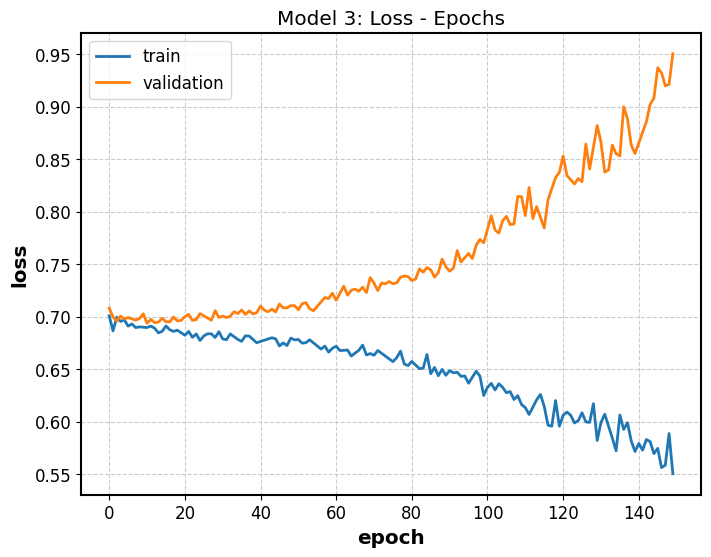

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_3.history.history['loss'], label = 'train')
plt.plot(model_3.history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 3: Loss - Epochs')

The loss chart for validation data is ascending, but as you will see in the next chart, since the accuracy value is increasing, we continue the training process.
Actually, this is the tradeoff between bias and variance.

Text(0.5, 1.0, 'Model 3: Accuracy - Epochs')

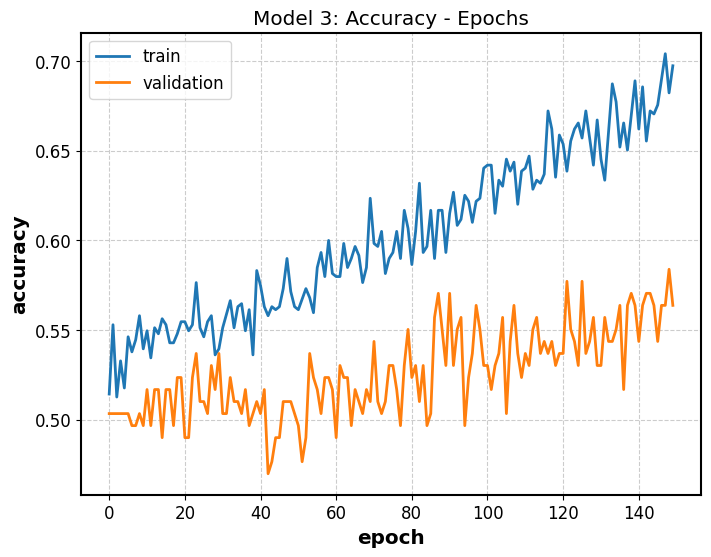

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_3.history.history['accuracy'], label = 'train')
plt.plot(model_3.history.history['val_accuracy'], label = 'validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.title('Model 3: Accuracy - Epochs')

In [ ]:
#Define the feature set X and response variable for test dataset
#Time window
window = 4
X_test = []
y_test = []
for i in range(window, test.shape[0]):
    X_test.append(test.iloc[i - window : i, [5, 6, 8]])
    y_test.append(test.iloc[i, 9])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test

array([[[ 1.26849693e-03,  7.83495864e-02,  4.95139721e-01],
        [-2.47567304e-02,  3.36631701e-02,  5.61712625e-01],
        [ 3.43357146e-02,  9.72600503e-02,  4.68428840e-01],
        [ 7.01043485e-03, -2.38584459e-02,  7.08290896e-01]],

       [[-2.47567304e-02,  3.36631701e-02,  5.61712625e-01],
        [ 3.43357146e-02,  9.72600503e-02,  4.68428840e-01],
        [ 7.01043485e-03, -2.38584459e-02,  7.08290896e-01],
        [ 9.69528502e-03, -3.15984051e-03,  7.81498406e-01]],

       [[ 3.43357146e-02,  9.72600503e-02,  4.68428840e-01],
        [ 7.01043485e-03, -2.38584459e-02,  7.08290896e-01],
        [ 9.69528502e-03, -3.15984051e-03,  7.81498406e-01],
        [ 4.09804545e-03, -7.60183104e-03,  8.05988206e-01]],

       ...,

       [[ 4.94478108e-03,  7.06359860e-01,  9.39126970e-01],
        [ 8.66143600e-04, -5.25429424e-01,  9.44020129e-01],
        [-1.95448200e-04, -5.76923704e-01,  9.27355757e-01],
        [ 5.12816668e-03,  6.69487015e-01,  9.33256692e-01]],

   

In [ ]:
X_test.shape

(248, 4, 3)

In [ ]:
#Make prediction on test dataset
y_prob_test = model_3.predict(X_test)
y_prob_test

8/8 [==============================] - 1s 3ms/step


array([[5.4545516e-01],
       [4.7783977e-01],
       [5.7902730e-01],
       [6.2517178e-01],
       [6.3577217e-01],
       [6.2669963e-01],
       [4.6071127e-01],
       [5.1490945e-01],
       [6.7638701e-01],
       [5.6057751e-01],
       [6.8519157e-01],
       [6.1325860e-01],
       [6.8723351e-01],
       [5.5391467e-01],
       [5.8116138e-01],
       [4.8565167e-01],
       [7.0371234e-01],
       [5.9939933e-01],
       [3.5272634e-01],
       [1.6477306e-01],
       [3.9033359e-01],
       [6.4368379e-01],
       [8.5070324e-01],
       [5.1154625e-01],
       [5.1912433e-01],
       [4.0615103e-01],
       [3.7423629e-01],
       [4.7068888e-01],
       [6.4771116e-01],
       [4.9248728e-01],
       [6.6125959e-01],
       [4.8974079e-01],
       [4.1801628e-01],
       [6.8361509e-01],
       [4.9075815e-01],
       [4.9624485e-01],
       [7.5973415e-01],
       [4.6088639e-01],
       [2.7996495e-01],
       [4.9885839e-01],
       [6.1732376e-01],
       [5.069962

In [ ]:
y_pred_test = [1 if _ > 0.5 else 0 for _ in y_prob_test]
y_pred_test

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1]

In [ ]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

54.83870967741935

In [ ]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

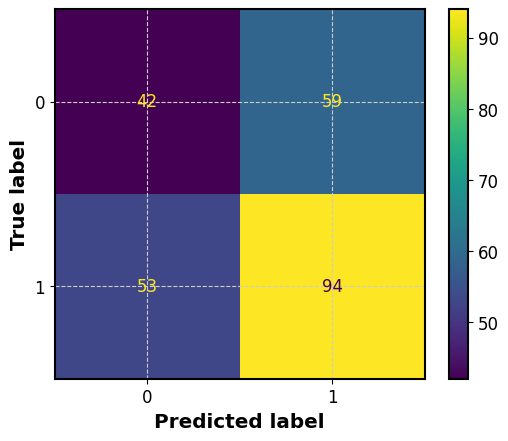

In [ ]:
#Confusion matrix for test dataset
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
#Model evaluation
#Accuracy = TP + TN / Total

print("The Accuracy of This Model is: ", (cm[0][0]+cm[1][1])/len(y_test))

The Accuracy of This Model is:  0.5483870967741935


In [ ]:
#Precision = TP / TP + FP

print("The Precission of This Midel is: ", cm[1][1]/(cm[1][1]+cm[0][1]))

The Precission of This Midel is:  0.6143790849673203


In [ ]:
#Sensitivity
#TP / TP + FN

print("The Sensitivity of This Midel is: ", cm[1][1]/(cm[1][1]+cm[1][0]))

The Sensitivity of This Midel is:  0.6394557823129252


In [ ]:
#Specificity
#TN / TN + FP

print("The Specificity of This Midel is: ", cm[0][0]/(cm[0][0]+cm[0][1]))

The Specificity of This Midel is:  0.4158415841584158


### Summary of results on test data

When we build these three models with train data, the values of **Accuracy**, **Precision**, **Sensitivity** and **Specificity**, are as follows:

**Model 1**:

Accuracy: 56.45, Precision: 59.33, Sensitivity: 84.35, Specificity: 15.84

**Model 2:**

Accuracy: 58.87, Precision: 59.41, Sensitivity: 96.60, Specificity: 3.96

**Model 3:**

Accuracy: 54.84, Precision: 61.44, Sensitivity: 63.94, Specificity: 41.58

As it is obvious, the second model has the highest accuracy and the highest sensitivity, and the third model has the highest specificity.
The two indicators, Specificity and Sensitivity, are more important than the rest of the indicators, because Specificity tells us that when the market is bearish, in what percentage of cases, our model is able to recognize the trend correctly, and also Sensitivity tells us when The market is bullish, in some percentage of cases we were able to correctly identify the trend.

Now we come to the question, which of these three models should be chosen?

At first glance, we may choose the second model, because it has high accuracy, but this model is very scary to use 😨 and not reliable at all, because as it's shown, it has little sensitivity, and this means that it does not work well in bearish markets.

For this reason, we go to use the third model, which in general, in both bullish and bearish markets perform better.

## Strategy Implementation

Finally we reach to the most intresting part of this project

Now we want to trade using these models in one year that is starts from the beginning of 2020. We will start trading with 1000 dollars and we will check the result to see if we have been able to make a profit or not 💲

In [ ]:
#Define the feature set X and response variable for real dataset
#Time window
window = 4
X_real = []
y_real = []
for i in range(window, real.shape[0]):
    X_real.append(real.iloc[i - window : i, [5, 6, 8]])
    y_real.append(real.iloc[i, 9])
X_real, y_real = np.array(X_real), np.array(y_real)

In [ ]:
X_real

array([[[ 8.37880268e-03,  1.95238984e-01,  6.74491812e-01],
        [-7.05987056e-03,  7.15910437e-03,  4.98705399e-01],
        [ 3.53337289e-03,  6.24903148e-02,  4.27265612e-01],
        [-2.80323865e-03, -7.19926751e-02,  6.31574354e-01]],

       [[-7.05987056e-03,  7.15910437e-03,  4.98705399e-01],
        [ 3.53337289e-03,  6.24903148e-02,  4.27265612e-01],
        [-2.80323865e-03, -7.19926751e-02,  6.31574354e-01],
        [ 4.90245137e-03,  8.46733471e-02,  5.94758420e-01]],

       [[ 3.53337289e-03,  6.24903148e-02,  4.27265612e-01],
        [-2.80323865e-03, -7.19926751e-02,  6.31574354e-01],
        [ 4.90245137e-03,  8.46733471e-02,  5.94758420e-01],
        [ 6.65526261e-03, -2.29712035e-02,  7.62317121e-01]],

       ...,

       [[-3.90627905e-03, -3.30912626e-01,  4.50947860e-01],
        [-2.07309286e-03, -1.46416402e-01,  5.49582321e-01],
        [ 7.45811251e-04, -6.76360801e-02,  5.09746113e-01],
        [ 3.53658900e-03, -5.01534733e-01,  5.16111997e-01]],

   

In [ ]:
X_real.shape

(248, 4, 3)

In [ ]:
y_real.shape

(248,)

In [ ]:
#Make prediction on real dataset
y_prob_real = model_3.predict(X_real)
y_prob_real

8/8 [==============================] - 0s 3ms/step


array([[6.38891935e-01],
       [4.57662135e-01],
       [5.70350111e-01],
       [4.41623420e-01],
       [6.15858912e-01],
       [5.27319729e-01],
       [5.56921840e-01],
       [5.77621281e-01],
       [6.75521433e-01],
       [6.48288310e-01],
       [5.53193688e-01],
       [3.73024404e-01],
       [6.58635974e-01],
       [5.82700014e-01],
       [5.50660074e-01],
       [4.07071024e-01],
       [8.02809119e-01],
       [4.82858717e-01],
       [5.21423638e-01],
       [3.09859097e-01],
       [1.07325137e-01],
       [3.71205360e-01],
       [6.20611548e-01],
       [6.24167323e-01],
       [6.20011389e-01],
       [5.29983044e-01],
       [5.39569616e-01],
       [6.17892444e-01],
       [6.39338017e-01],
       [4.61686134e-01],
       [4.57024157e-01],
       [7.02893317e-01],
       [6.39464557e-01],
       [8.14103782e-01],
       [2.09771525e-02],
       [8.98276508e-01],
       [8.39165688e-01],
       [2.76410617e-02],
       [9.09449220e-01],
       [8.00251722e-01],


In [ ]:
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]
y_pred_real

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

In [ ]:
#Accuracy
sum(y_pred_real == y_real) / len(y_real) * 100

58.06451612903226

In [ ]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_real = confusion_matrix(y_real, y_pred_real)
print(confusion_matrix_real)

[[ 42  64]
 [ 40 102]]


In [ ]:
len(y_pred_real)

248

In [ ]:
real.shape

(252, 10)

In [ ]:
real_tr = real[4:]

In [ ]:
real_tr.shape

(248, 10)

In [ ]:
real_tr['pred'] = y_pred_real
real_tr

<ipython-input-113-e8c76dca30f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred
Date,,,,,,,,,,,
2020-01-08 00:00:00-05:00,3238.590088,3253.050049,3726840000,3237.179932,3.435910e+09,0.004902,0.084673,58.353761,0.594758,1,1
2020-01-09 00:00:00-05:00,3266.030029,3274.699951,3641230000,3253.050049,3.726840e+09,0.006655,-0.022971,74.793512,0.762317,1,0
2020-01-10 00:00:00-05:00,3281.810059,3265.350098,3214580000,3274.699951,3.641230e+09,-0.002855,-0.117172,80.650275,0.822011,0,1
2020-01-13 00:00:00-05:00,3271.129883,3288.129883,3459390000,3265.350098,3.214580e+09,0.006976,0.076156,66.670815,0.679528,1,0
2020-01-14 00:00:00-05:00,3285.350098,3283.149902,3687620000,3288.129883,3.459390e+09,-0.001515,0.065974,74.513451,0.759463,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,3693.419922,3690.010010,3779160000,3687.260010,4.053310e+09,0.000746,-0.067636,50.012916,0.509746,1,1
2020-12-24 00:00:00-05:00,3694.030029,3703.060059,1883780000,3690.010010,3.779160e+09,0.003537,-0.501535,50.637495,0.516112,1,0
2020-12-28 00:00:00-05:00,3723.030029,3735.360107,3535460000,3703.060059,1.883780e+09,0.008723,0.876790,72.452121,0.738453,1,0


In [ ]:
#Balance over time
real_tr['balance'] = 0
real_tr.head()

<ipython-input-114-72d3da71ce75>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2020-01-08 00:00:00-05:00,3238.590088,3253.050049,3726840000,3237.179932,3.435910e+09,0.004902,0.084673,58.353761,0.594758,1,1,0
2020-01-09 00:00:00-05:00,3266.030029,3274.699951,3641230000,3253.050049,3.726840e+09,0.006655,-0.022971,74.793512,0.762317,1,0,0
2020-01-10 00:00:00-05:00,3281.810059,3265.350098,3214580000,3274.699951,3.641230e+09,-0.002855,-0.117172,80.650275,0.822011,0,1,0
2020-01-13 00:00:00-05:00,3271.129883,3288.129883,3459390000,3265.350098,3.214580e+09,0.006976,0.076156,66.670815,0.679528,1,0,0
2020-01-14 00:00:00-05:00,3285.350098,3283.149902,3687620000,3288.129883,3.459390e+09,-0.001515,0.065974,74.513451,0.759463,0,1,0


In [ ]:
#initial deposit : $1000
real_tr.iloc[0, 11] = 1000
real_tr.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2020-01-08 00:00:00-05:00,3238.590088,3253.050049,3726840000,3237.179932,3.435910e+09,0.004902,0.084673,58.353761,0.594758,1,1,1000
2020-01-09 00:00:00-05:00,3266.030029,3274.699951,3641230000,3253.050049,3.726840e+09,0.006655,-0.022971,74.793512,0.762317,1,0,0
2020-01-10 00:00:00-05:00,3281.810059,3265.350098,3214580000,3274.699951,3.641230e+09,-0.002855,-0.117172,80.650275,0.822011,0,1,0
2020-01-13 00:00:00-05:00,3271.129883,3288.129883,3459390000,3265.350098,3.214580e+09,0.006976,0.076156,66.670815,0.679528,1,0,0
2020-01-14 00:00:00-05:00,3285.350098,3283.149902,3687620000,3288.129883,3.459390e+09,-0.001515,0.065974,74.513451,0.759463,0,1,0


In [ ]:
real_tr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2020-01-08 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          248 non-null    float64
 1   close         248 non-null    float64
 2   volume        248 non-null    int64  
 3   close_shift   248 non-null    float64
 4   volume_shift  248 non-null    float64
 5   daily_return  248 non-null    float64
 6   vol_change    248 non-null    float64
 7   rsi           248 non-null    float64
 8   rsi_scaled    248 non-null    float64
 9   trend         248 non-null    int64  
 10  pred          248 non-null    int64  
 11  balance       248 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 25.2 KB


In [ ]:
#Trade Simulation
for i in range(1, real_tr.shape[0]):
    if real_tr.iloc[i, 10] == 1:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 1] / real_tr.iloc[i, 0]
    if real_tr.iloc[i, 10] == 0:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 0] / real_tr.iloc[i, 1]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
real_tr.head(20)

,open,close,volume,close_shift,volume_shift,daily_return,vol_change,rsi,rsi_scaled,trend,pred,balance
Date,,,,,,,,,,,,
2020-01-08 00:00:00-05:00,3238.590088,3253.050049,3726840000,3237.179932,3.435910e+09,0.004902,0.084673,58.353761,0.594758,1,1,1000.000000
2020-01-09 00:00:00-05:00,3266.030029,3274.699951,3641230000,3253.050049,3.726840e+09,0.006655,-0.022971,74.793512,0.762317,1,0,997.352453
2020-01-10 00:00:00-05:00,3281.810059,3265.350098,3214580000,3274.699951,3.641230e+09,-0.002855,-0.117172,80.650275,0.822011,0,1,992.350219
2020-01-13 00:00:00-05:00,3271.129883,3288.129883,3459390000,3265.350098,3.214580e+09,0.006976,0.076156,66.670815,0.679528,1,0,987.219657
2020-01-14 00:00:00-05:00,3285.350098,3283.149902,3687620000,3288.129883,3.459390e+09,-0.001515,0.065974,74.513451,0.759463,0,1,986.558517
2020-01-15 00:00:00-05:00,3282.270020,3289.290039,3721490000,3283.149902,3.687620e+09,0.001870,0.009185,69.771984,0.711136,1,1,988.668539
2020-01-16 00:00:00-05:00,3302.969971,3316.810059,3540580000,3289.290039,3.721490e+09,0.008367,-0.048612,80.748894,0.823016,1,1,992.811252
2020-01-17 00:00:00-05:00,3323.659912,3329.620117,3726220000,3316.810059,3.540580e+09,0.003862,0.052432,87.027106,0.887005,1,1,994.591627
2020-01-21 00:00:00-05:00,3321.030029,3320.790039,4104840000,3329.620117,3.726220e+09,-0.002652,0.101610,82.468975,0.840548,0,1,994.519754


Text(0.5, 1.0, 'Model 1: Balance')

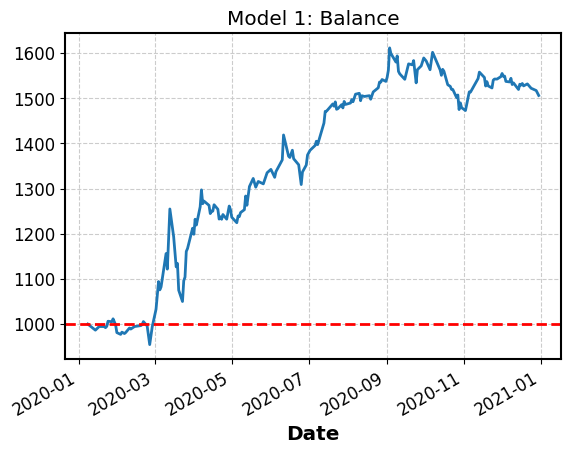

In [ ]:
real_tr.loc[:, 'balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')
plt.title('Model 1: Balance')

As it turns out, if we were trading using Model 3, we would have made $300 in profit at the end of the trading year.

### What if other Models Implemented?

But if we used two other models, what would be the result?

In [ ]:
#Define the feature set X and response variable for real dataset
#Time window
window = 4
X_real = []
y_real = []
for i in range(window, real.shape[0]):
    X_real.append(real.iloc[i - window : i, 5])
    y_real.append(real.iloc[i, 9])
X_real, y_real = np.array(X_real), np.array(y_real)

In [ ]:
X_real.shape

(248, 4)

In [ ]:
#Reshape X_train
n_features = 1
X_real = X_real.reshape(X_real.shape[0], X_real.shape[1], n_features)
X_real.shape

(248, 4, 1)

In [ ]:
#Model 1
#Make prediction on real dataset
y_prob_real = model_1.predict(X_real)
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]
#Accuracy
sum(y_pred_real == y_real) / len(y_real) * 100

8/8 [==============================] - 0s 4ms/step


57.25806451612904

In [ ]:
#Add prediction to real data set
real_tr['pred'] = y_pred_real
#Balance over time
real_tr['balance'] = 0
#initial deposit : $1000
real_tr.iloc[0, 11] = 1000

#Trade Simulation
for i in range(1, real_tr.shape[0]):
    if real_tr.iloc[i, 10] == 1:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 1] / real_tr.iloc[i, 0]
    if real_tr.iloc[i, 10] == 0:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 0] / real_tr.iloc[i, 1]

<ipython-input-124-951262ae97f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-951262ae97f4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Text(0.5, 1.0, 'Model 1: Balance')

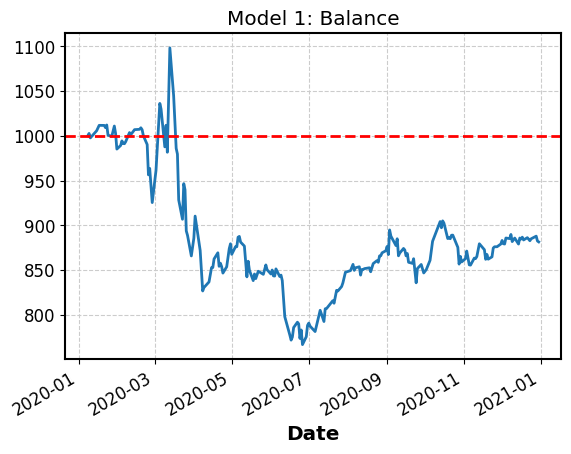

In [ ]:
real_tr.loc[:, 'balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')
plt.title('Model 1: Balance')

In [ ]:
#Model 2
#Make prediction on real dataset
y_prob_real = model_2.predict(X_real)
y_pred_real = [1 if _ > 0.5 else 0 for _ in y_prob_real]
#Accuracy
sum(y_pred_real == y_real) / len(y_real) * 100

8/8 [==============================] - 1s 4ms/step


57.25806451612904

In [ ]:
#Add prediction to real data set
real_tr['pred'] = y_pred_real
#Balance over time
real_tr['balance'] = 0
#initial deposit : $1000
real_tr.iloc[0, 11] = 1000

#Trade Simulation
for i in range(1, real_tr.shape[0]):
    if real_tr.iloc[i, 10] == 1:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 1] / real_tr.iloc[i, 0]
    if real_tr.iloc[i, 10] == 0:
        real_tr.iloc[i, 11] = real_tr.iloc[i - 1, 11] * real_tr.iloc[i, 0] / real_tr.iloc[i, 1]

<ipython-input-127-951262ae97f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-951262ae97f4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Text(0.5, 1.0, 'Model 2: Balance')

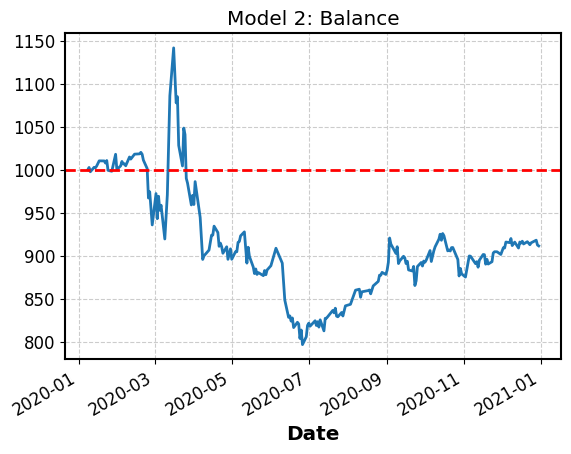

In [ ]:
real_tr.loc[:, 'balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')
plt.title('Model 2: Balance')

As you can see, if we used the first or second models, not only would we not make a profit, but we would also make a loss.

In the end, I must say that behind the scenes of each of the parameters used in these models, a lot of fine tuning has been done to optimize the parameters, which I prevented from bringing them in this project due to the large amount of codes.

# End of the Code